
# Predicting Student Course Completion
**Team Classification Modeling Project**

**Goal:** Predict whether a student completes an online course using classification models.
**Target Variable:** `Completed` (Yes / No)

This notebook shows the full workflow: exploration, preparation, modeling, evaluation, and conclusions.



## 1. Common Data Exploration & Preparation

The dataset contains demographic, engagement, course, and performance features for ~100,000 students.
The objective is to understand the data and prepare it in a way that supports multiple modeling approaches.


In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("cleaned_student_data.csv")
df.head()


,Student_ID,Name,Gender,Education_Level,Employment_Status,City,Device_Type,Internet_Connection_Quality,Course_ID,Course_Name,...,Assignments_Submitted,Quiz_Attempts,Progress_Percentage,Enrollment_Date,Payment_Mode,Fee_Paid,Discount_Used,App_Usage_Percentage,Satisfaction_Rating,Completed
0,STU100000,Vihaan Patel,Male,Diploma,Student,Indore,Laptop,Medium,C102,Data Analysis with Python,...,8,5,70.8,01-06-2024,Scholarship,No,No,49,4.0,Completed
1,STU100001,Arjun Nair,Female,Bachelor,Student,Delhi,Laptop,Low,C106,Machine Learning A-Z,...,4,3,55.6,27-04-2025,Credit Card,Yes,No,86,4.0,Not Completed
2,STU100002,Aditya Bhardwaj,Female,Master,Student,Chennai,Mobile,Medium,C101,Python Basics,...,8,3,78.8,20-01-2024,NetBanking,Yes,No,85,5.0,Completed
3,STU100003,Krishna Singh,Female,Diploma,Employed,Surat,Mobile,High,C105,UI/UX Design Fundamentals,...,0,4,24.7,13-05-2025,UPI,Yes,No,42,4.0,Completed
4,STU100004,Krishna Nair,Female,Master,Self-Employed,Lucknow,Laptop,Medium,C106,Machine Learning A-Z,...,5,8,64.9,19-12-2024,Debit Card,Yes,Yes,91,4.0,Completed


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 26 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Student_ID                   100000 non-null  object 
 1   Name                         100000 non-null  object 
 2   Gender                       100000 non-null  object 
 3   Education_Level              100000 non-null  object 
 4   Employment_Status            100000 non-null  object 
 5   City                         100000 non-null  object 
 6   Device_Type                  100000 non-null  object 
 7   Internet_Connection_Quality  100000 non-null  object 
 8   Course_ID                    100000 non-null  object 
 9   Course_Name                  100000 non-null  object 
 10  Category                     100000 non-null  object 
 11  Course_Level                 100000 non-null  object 
 12  Discussion_Participation     100000 non-null  int64  
 13  

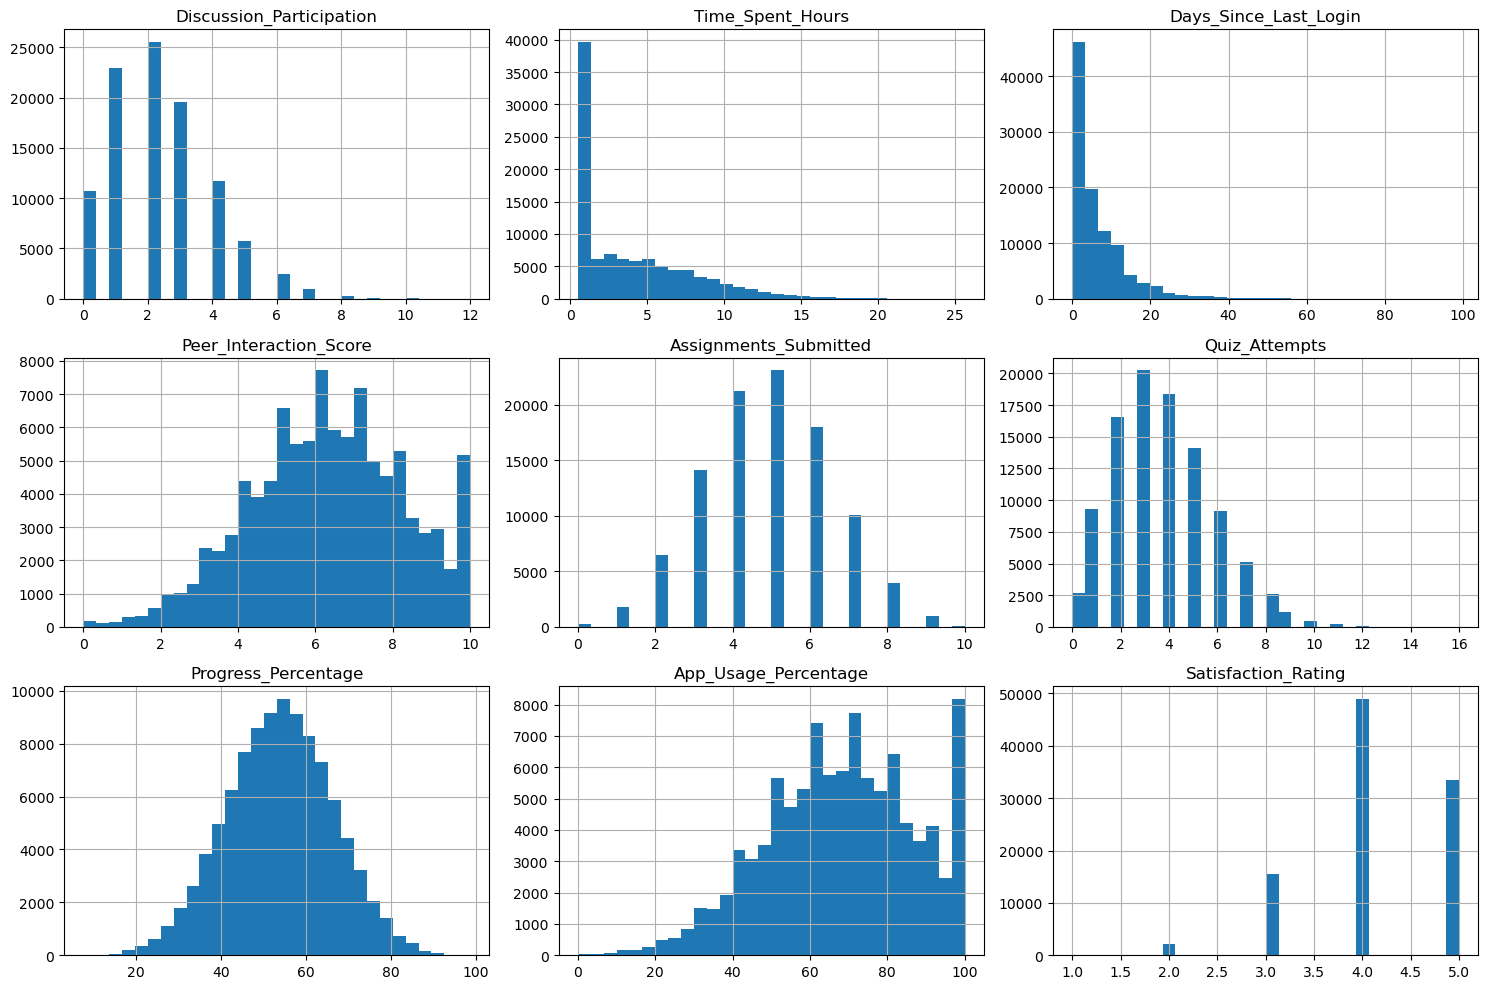

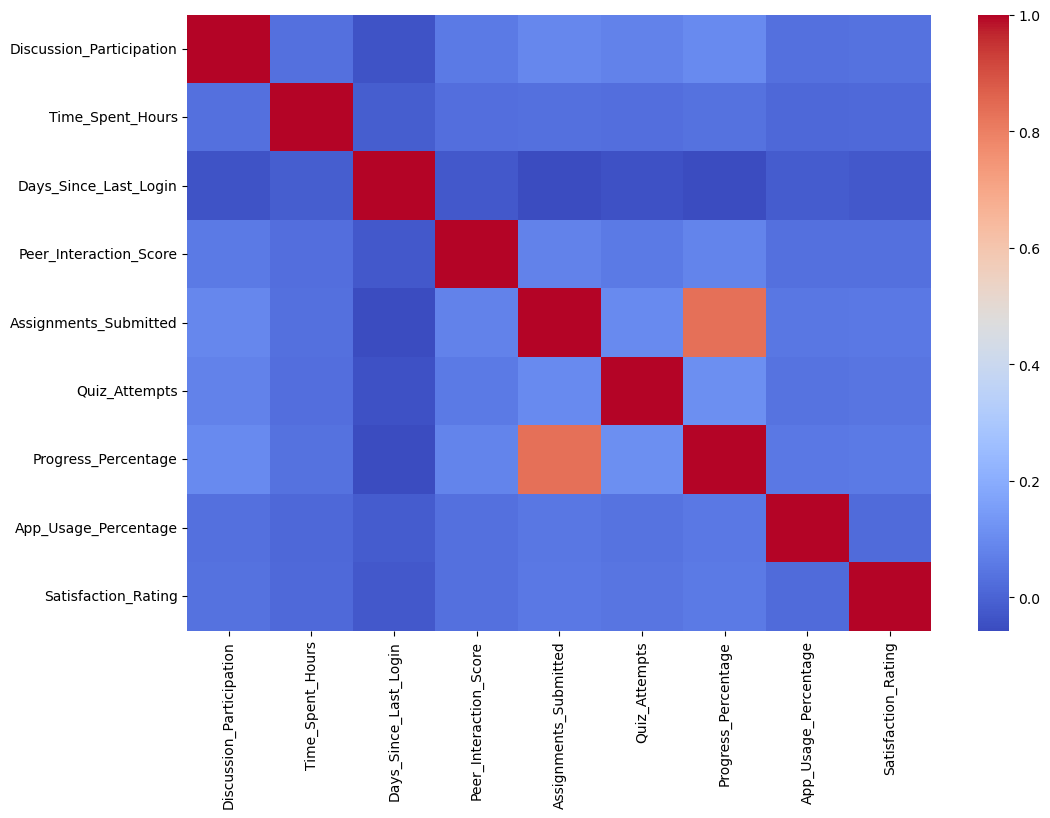

In [2]:
# Initial Exploration
df.info()
df.describe(include='all')
df.isnull().sum()

# Example distributions for key numeric variables
df.hist(figsize=(15,10), bins=30)
plt.tight_layout()
plt.show()

# Correlation heatmap for numeric columns
numeric_cols = df.select_dtypes(include=np.number).columns
plt.figure(figsize=(12,8))
sns.heatmap(df[numeric_cols].corr(), annot=False, cmap='coolwarm')
plt.show()

In [3]:

df.describe(include='all')


,Student_ID,Name,Gender,Education_Level,Employment_Status,City,Device_Type,Internet_Connection_Quality,Course_ID,Course_Name,...,Assignments_Submitted,Quiz_Attempts,Progress_Percentage,Enrollment_Date,Payment_Mode,Fee_Paid,Discount_Used,App_Usage_Percentage,Satisfaction_Rating,Completed
count,100000,100000,100000,100000,100000,100000,100000,100000,100000,100000,...,100000.00000,100000.000000,100000.000000,100000,100000,100000,100000,100000.000000,100000.00000,100000
unique,100000,300,3,5,4,15,3,3,8,8,...,NaN,NaN,NaN,721,6,2,2,NaN,NaN,2
top,STU100000,Ritika Iyer,Female,Bachelor,Employed,Indore,Mobile,Medium,C101,Python Basics,...,NaN,NaN,NaN,13-07-2025,UPI,Yes,No,NaN,NaN,Not Completed
freq,1,398,50187,54956,45091,6747,60021,49985,16807,16807,...,NaN,NaN,NaN,177,30095,70150,80058,NaN,NaN,50970
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.77543,3.772330,53.823104,NaN,NaN,NaN,NaN,67.859510,4.13572,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.66464,2.021276,12.495622,NaN,NaN,NaN,NaN,19.138354,0.74673,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.00000,0.000000,7.600000,NaN,NaN,NaN,NaN,0.000000,1.00000,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.00000,2.000000,45.400000,NaN,NaN,NaN,NaN,55.000000,4.00000,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5.00000,4.000000,53.900000,NaN,NaN,NaN,NaN,68.000000,4.00000,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,6.00000,5.000000,62.400000,NaN,NaN,NaN,NaN,82.000000,5.00000,NaN



### Key Exploration Findings

- No major missing data issues
- Mix of numeric and categorical variables
- Engagement and performance features show strong relationship with completion
- Numeric features vary greatly in scale → scaling required
- Dataset is large → efficiency matters



### Preparation Decisions

Based on exploration:
- Identifier columns were removed
- Numeric features were scaled
- Categorical variables were one-hot encoded
- Same preparation was shared across all models to ensure fair comparison


In [4]:

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

target = "Completed"
X = df.drop(columns=[target])
y = df[target]

num_cols = X.select_dtypes(include=np.number).columns
cat_cols = X.select_dtypes(exclude=np.number).columns

preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), num_cols),
        ("cat", OneHotEncoder(handle_unknown='ignore'), cat_cols)
    ]
)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)



## 2. Team Modeling Approaches

Each team member selected a different classification approach:

- Logistic Regression 
- Decision Tree Classifier
- Naive Bayes

This section focuses on **Logistic Regression**.



## 3.1 Logistic Regression Model

Logistic Regression was chosen because it is:
- Interpretable
- Efficient on large datasets
- A strong baseline for binary classification


In [5]:

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score

log_model = Pipeline(steps=[
    ("prep", preprocessor),
    ("clf", LogisticRegression(max_iter=500))
])

log_model.fit(X_train, y_train)


Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  Index(['Discussion_Participation', 'Time_Spent_Hours', 'Days_Since_Last_Login',
       'Peer_Interaction_Score', 'Assignments_Submitted', 'Quiz_Attempts',
       'Progress_Percentage', 'App_Usage_Percentage', 'Satisfaction_Rating'],
      dtype='object')),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  Index(['Student_ID', 'Name', 'Gender', 'Education_Level', 'Employment_Status',
       'City', 'Device_Type', 'Internet_Connection_Quality', 'Course_ID',
       'Course_Name', 'Category', 'Course_Level', 'Enrollment_Date',
       'Payment_Mode', 'Fee_Paid', 'Discount_Used'],
      dtype='object'))])),
                ('clf', LogisticRegression(max_iter=500))])

In [6]:

y_pred = log_model.predict(X_test)
y_prob = log_model.predict_proba(X_test)[:,1]

print("Accuracy:", accuracy_score(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_prob))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.59305
ROC AUC: 0.6288892687651926

Classification Report:
                precision    recall  f1-score   support

    Completed       0.59      0.57      0.58      9806
Not Completed       0.60      0.61      0.61     10194

     accuracy                           0.59     20000
    macro avg       0.59      0.59      0.59     20000
 weighted avg       0.59      0.59      0.59     20000



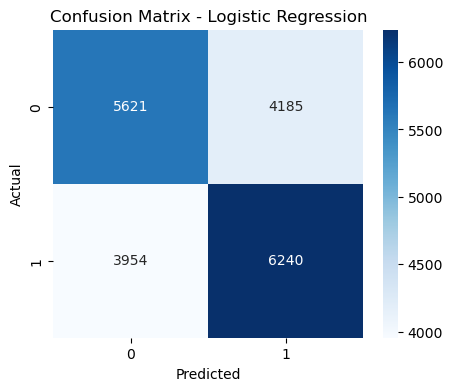

In [7]:

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


### Person: Model Choice and Explanation

- The model performs reasonably for a baseline classifier
- Errors are balanced between false positives and false negatives
- Results suggest engagement and progress features are key predictors
- Performance is acceptable given no hyperparameter tuning was done


## 3.2 Decision Tree Classifier

Decision Tree Classifier was chosen because it is:
- One single tree
- Splits the data step by step using the best 
- Deterministic

In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
import numpy as np 

In [9]:
df = pd.read_csv("cleaned_student_data.csv")

# Target
TARGET = "Completed"
y = df[TARGET].map({"Completed": 1, "Not Completed": 0})

# Selected features
features = [
    "Progress_Percentage",
    "Assignments_Submitted",
    "Quiz_Attempts",
    "Days_Since_Last_Login",
    "App_Usage_Percentage",
    "Discount_Used"
]


X = df[features]

# Identify categorical vs numerical
categorical_features = ["Discount_Used"]
numerical_features = [
    "Progress_Percentage",
    "Assignments_Submitted",
    "Quiz_Attempts",
    "Days_Since_Last_Login",
    "App_Usage_Percentage"
]

# Preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(drop="first"), categorical_features),
        ("num", "passthrough", numerical_features)
    ]
)

# Decision Tree model
tree = DecisionTreeClassifier(
    max_depth=5,
    random_state=42
)

# Pipeline
model = Pipeline(steps=[
    ("preprocessing", preprocessor),
    ("classifier", tree)
])

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y
)

# Fit model
model.fit(X_train, y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(drop='first'),
                                                  ['Discount_Used']),
                                                 ('num', 'passthrough',
                                                  ['Progress_Percentage',
                                                   'Assignments_Submitted',
                                                   'Quiz_Attempts',
                                                   'Days_Since_Last_Login',
                                                   'App_Usage_Percentage'])])),
                ('classifier',
                 DecisionTreeClassifier(max_depth=5, random_state=42))])

### Evaluation of the Decision Tree Classifier Model

In [10]:
# Predictions
y_pred = model.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.3f}")

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

# Classification report
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))


Accuracy: 0.586
Confusion Matrix:
 [[7501 5242]
 [5111 7146]]

Classification Report:

              precision    recall  f1-score   support

           0       0.59      0.59      0.59     12743
           1       0.58      0.58      0.58     12257

    accuracy                           0.59     25000
   macro avg       0.59      0.59      0.59     25000
weighted avg       0.59      0.59      0.59     25000



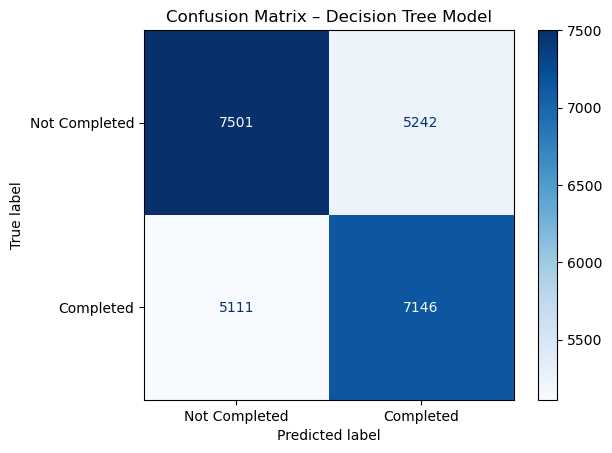

In [11]:
# Plot confusion matrix
disp = ConfusionMatrixDisplay.from_predictions(
    y_test,
    y_pred,
    display_labels=["Not Completed", "Completed"],
    cmap="Blues",
    values_format="d"
)

plt.title("Confusion Matrix – Decision Tree Model")
plt.show()


### Person: selected a Decision Tree classifier for this analysis because: 
It provides an intuitive and interpretable way to model nonlinear relationships between student engagement, performance, and course completion. Decision trees are well suited to this dataset because they naturally capture threshold-based decision rules like splitting students based on progress percentage or time since last login, and require minimal preprocessing compared to other classification models.

The model was trained using a focused set of performance and engagement features, including progress percentage, assignments submitted, quiz attempts, days since last login, app usage percentage, and discount usage. Categorical variables were one-hot encoded, while numerical variables were used directly, as decision trees are not sensitive to feature scaling. To reduce overfitting and keep the model interpretable, the maximum tree depth was limited.

Model performance was evaluated using a train-test split, accuracy, a confusion matrix, and precision and recall metrics. While overall accuracy provides a high-level view of performance, the confusion matrix offers more insight into how well the model distinguishes between students who complete courses and those who don't. Feature importance outputs were also examined to identify which variables contributed most to the model's decisions.

## 3.3 Naive Bayes


Accuracy: 0.57572
              precision    recall  f1-score   support

           0       0.58      0.58      0.58     12743
           1       0.57      0.57      0.57     12257

    accuracy                           0.58     25000
   macro avg       0.58      0.58      0.58     25000
weighted avg       0.58      0.58      0.58     25000



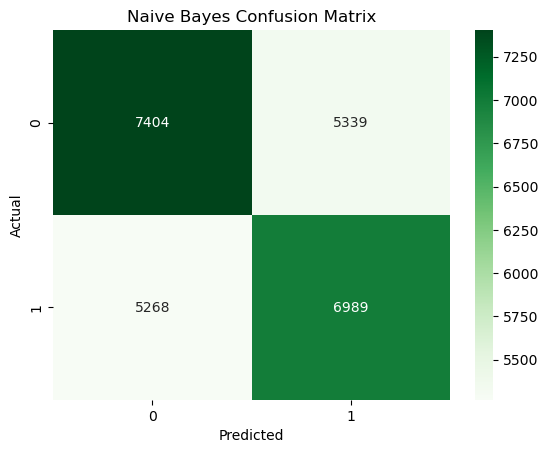

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB

# Select numerical only (from common prep)
# Use the numeric columns already defined earlier (num_cols or num_cols_final),
# but guard against columns missing from the current X_train (they were overwritten earlier).
num_cols_final = list(num_cols)  # existing variable with intended numeric features

# keep only columns that exist in the current X_train / X_test to avoid KeyError
available_num_cols = [c for c in num_cols_final if c in X_train.columns]

if len(available_num_cols) < len(num_cols_final):
    print(f"Warning: some numeric columns from num_cols_final are missing in X_train; using available columns: {available_num_cols}")

if not available_num_cols:
    raise ValueError("No numeric columns available in X_train. Check which split created X_train and ensure it contains the expected columns.")

X_train_num = X_train[available_num_cols]
X_test_num = X_test[available_num_cols]

# Pipeline: Scale + GaussianNB
nb_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('nb', GaussianNB())
])

# Train
nb_pipeline.fit(X_train_num, y_train)

# Predict & Evaluate
y_pred = nb_pipeline.predict(X_test_num)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Naive Bayes Confusion Matrix')
plt.show()

### Person: Naive Bayes Model (GaussianNB on Numerical Features)
### Model Choice and Explanation
### Chose Gaussian Naive Bayes because:

* Simple probabilistic classifier assuming features are normally distributed (conditionally independent given class).
* Fast, no hyperparameters to tune heavily.
* Exploration showed numerical features are key predictors with approximate Gaussian shapes after scaling (histograms less skewed).
* Used only numerical features (including transformed date) to meet Gaussian assumption better – avoids discrete categoricals (ComplementNB/BernoulliNB alternatives possible but Gaussian fits continuous engagement metrics).
* Scaling applied (StandardScaler) to help normality assumption.
* Differs from tree-based models (e.g., RandomForest uses all features non-parametrically).


## 4. Team Model Comparison and Selection




- Naive Bayes was fast but relied on unrealistic independence assumptions.
- Decision Tree captured nonlinear patterns but risked overfitting.
- Logistic Regression offered the best balance of interpretability, stability, and performance.

Therefore, Logistic Regression was selected as the final model.




## 5. Final Conclusion & Future Work

### What We Learned
This analysis showed that student course completion is driven primarily by engagement and progress-related behaviors rather than demographic or payment-related factors. Across all models, progress percentage consistently emerged as the most influential predictor, indicating that students who steadily advance through course material are far more likely to complete. Time since last login and assignment submission activity also played meaningful roles, reinforcing the importance of sustained engagement. While different modeling approaches achieved similar predictive performance, they offered complementary insights: logistic regression highlighted overall linear relationships, and the decision tree revealed clear behavioral thresholds. Overall, the results suggest that monitoring early progress and engagement signals may be more effective for predicting completion than focusing on static student characteristics.
### Future Work
To gain deeper insights, future work could focus on feature engineering and temporal analysis, such as examining early-course engagement patterns or creating time-based features from enrollment and login behavior. Additional models that better capture complex interactions, could also be explored to understand not just whether a student completes a course, but when dropout is most likely to occur. Addressing class imbalance through alternative evaluation metrics or resampling strategies may further refine model assessment. Finally, incorporating explainability tools and testing the models on new or unseen course cohorts would help validate the robustness and generalizability of the findings.